In [1]:
#menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = "/content/drive/MyDrive/Kuliah/Semester 7/Machine Learning/Praktikum/praktikum mandiri/praktikum mandiri 04/data"

In [3]:
#membaca file csv menggunakan pandas
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Kuliah/Semester 7/Machine Learning/Praktikum/praktikum mandiri/praktikum mandiri 04/data/calonpembelimobil.csv")
df

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1
...,...,...,...,...,...,...,...
995,996,51,0,1,2,293,1
996,997,61,1,0,2,275,1
997,998,45,1,0,0,406,1
998,999,48,0,1,2,432,1


In [14]:
# 1. Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
)


In [7]:
# 2. Melihat Informasi Umum
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [8]:
# 3. Pra-Pemrosesan Data
# Menghapus kolom ID karena tidak berpengaruh terhadap proses prediksi
df = df.drop(columns=["ID"])

# Menentukan kolom target yang akan diprediksi
target = "Beli_Mobil"

# Memisahkan fitur (variabel independen) dan target (variabel dependen)
X = df.drop(columns=[target])
y = df[target]

# Mengidentifikasi kolom numerik dan kategorik
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

print("Kolom Numerik:", list(num_cols))
print("Kolom Kategorik:", list(cat_cols))


Kolom Numerik: ['Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan']
Kolom Kategorik: []


In [10]:
# 4. Pembagian Dataset Menjadi Data Latih dan Data Uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Jumlah Data Latih: {len(X_train)}")
print(f"Jumlah Data Uji  : {len(X_test)}")


Jumlah Data Latih: 800
Jumlah Data Uji  : 200


In [11]:
# 5. Pembangunan Model Logistic Regression
# Melakukan standarisasi pada kolom numerik agar memiliki skala yang seimbang
preprocessor = ColumnTransformer(
    transformers=[("num", StandardScaler(), num_cols)]
)

# Membuat pipeline yang menggabungkan proses scaling dan model Logistic Regression
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, solver='lbfgs', class_weight='balanced', random_state=42))
])

# Melatih model dengan data latih
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan'], dtype='object'))])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

Accuracy : 0.93
Precision: 0.9829
Recall   : 0.9055
F1-Score : 0.9426
ROC-AUC  : 0.9768

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.86      0.97      0.91        73
           1       0.98      0.91      0.94       127

    accuracy                           0.93       200
   macro avg       0.92      0.94      0.93       200
weighted avg       0.94      0.93      0.93       200



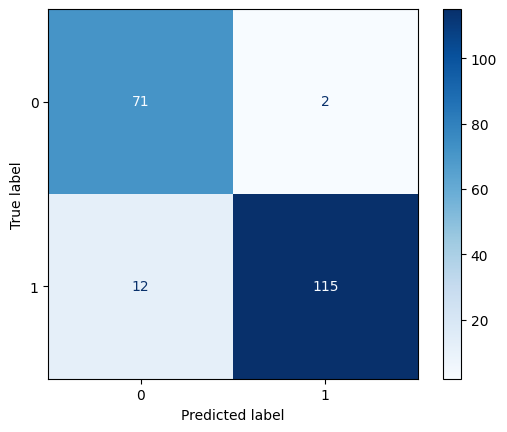

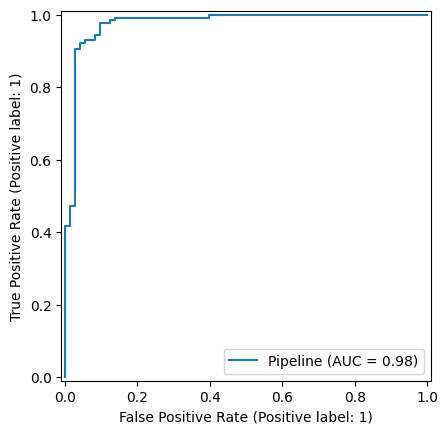

In [12]:
# 6. Evaluasi Model
# Melakukan prediksi terhadap data uji
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Menghitung metrik evaluasi model
print("Accuracy :", round(accuracy_score(y_test, y_pred), 4))
print("Precision:", round(precision_score(y_test, y_pred, pos_label=1), 4))
print("Recall   :", round(recall_score(y_test, y_pred, pos_label=1), 4))
print("F1-Score :", round(f1_score(y_test, y_pred, pos_label=1), 4))
print("ROC-AUC  :", round(roc_auc_score(y_test, y_proba), 4))

# Menampilkan classification report
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# Menampilkan confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")

# Menampilkan ROC curve
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()


In [15]:
# 7. Validasi Silang (Cross Validation)
# Melakukan validasi silang 5-fold untuk mengukur kestabilan model
scores = cross_val_score(model, X, y, cv=5)
print("Akurasi Tiap Fold:", scores)
print("Rata-rata Akurasi :", round(np.mean(scores), 4))
print("Standar Deviasi   :", round(np.std(scores), 4))


Akurasi Tiap Fold: [0.78  0.925 0.955 0.945 0.94 ]
Rata-rata Akurasi : 0.909
Standar Deviasi   : 0.0652


In [17]:
# 8. Prediksi Data Baru
# Membuat contoh data calon pembeli baru
data_baru = pd.DataFrame([{
    "Usia": 40,
    "Status": 2,
    "Kelamin": 1,
    "Memiliki_Mobil": 0,
    "Penghasilan": 300
}])

# Melakukan prediksi dan menghitung probabilitas
pred = model.predict(data_baru)
proba = model.predict_proba(data_baru)[0][1]

print("Prediksi:", "Beli Mobil" if pred[0]==1 else "Tidak Beli Mobil")
print("Probabilitas Membeli Mobil:", round(proba*100, 2), "%")


Prediksi: Beli Mobil
Probabilitas Membeli Mobil: 92.81 %
